In [409]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io as scipyio
import pandas as pd
from IPython.display import display
import seaborn as sns
from __future__ import division
import json
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [410]:
def formatData(dataS):
    finS = []
    ind = 0

    for r in dataS:
        curr = 0
        finS.append({})
        for i in r:
            if i['key'] == passwordarr[curr]:
                keyVal = i['key'] + '-' +str(curr) + '-'
                finS[ind][keyVal+'kftime'] = i['kftime']
                finS[ind][keyVal+'ftime'] = i['ftime']
                finS[ind][keyVal+'time'] = i['time']
                curr+=1
            else:
                try:
                    finS[ind]['m'] += 1
                except:
                    finS[ind]['m'] = 1
            
        finS[ind]['totaltime'] = sum([x['time'] for x in r])

        ind += 1
        
    return finS
    

with open('../electron-app/data/data-Saumitra.txt') as fS:
    raw = '[' + fS.read()[:-1] + ']'
    dataS = (json.loads(raw))
    
with open('../electron-app/data/data-Ishaan.txt') as fI:
    raw = '[' + fI.read()[:-1] + ']'
    dataI = (json.loads(raw))
    
with open('../electron-app/data/data-New guy.txt') as fN:
    raw = '[' + fN.read()[:-1] + ']'
    dataN = (json.loads(raw))
    
password = 'Hello good sir'
passwordarr = list(password)

finS = formatData(dataS)
finN = formatData(dataN)
finI = formatData(dataI)

dfS = pd.DataFrame(finS)

dfS.drop(['r-13-time', 'r-13-kftime', 'r-13-ftime'], axis=1, inplace=True)

dfI = pd.DataFrame(finI)
dfN = pd.DataFrame(finN)
dfN.drop(['r-13-time', 'r-13-kftime', 'r-13-ftime'], axis=1, inplace=True)

dfS['m'].fillna( 0, inplace=True)
dfI['m'].fillna( 0, inplace=True)
dfN['m'].fillna(0, inplace=True)

dfS.fillna(dfS.mean(), inplace=True)
dfI.fillna(dfI.mean(), inplace=True)
dfN.fillna(dfN.mean(), inplace=True)

dfS['totaltime'].fillna(dfS['totaltime'].mean())
dfI['totaltime'].fillna(dfI['totaltime'].mean())

display(dfS.head())
display(dfI.head())
display(dfN.head())

,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,9,68,59,630,744,114,430.3,63,63,67,...,29,101,72,60,105,45,63,158,95,1192
1,34,89,55,92,187,95,695.0,766,71,23,...,18,89,71,43,122,79,32,119,87,1220
2,48,119,71,133,224,91,569.0,628,59,69,...,65,124,59,62,133,71,27,127,100,1552
3,19,82,63,243,384,141,3039.0,3132,93,34,...,46,97,51,86,153,67,39,149,110,1416
4,0,194,194,0,239,239,0.0,159,159,0,...,0,213,213,0,195,195,0,151,151,10121


,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,0,576,576,0,515,515,0,623,623,0,...,0,173,173,0,228,228,0,254,254,137773
1,0,265,265,0,882,882,0,582,582,0,...,0,185,185,0,198,198,0,206,206,8893
2,0,381,381,0,654,654,0,396,396,0,...,0,168,168,0,283,283,0,180,180,5073
3,0,270,270,0,317,317,0,409,409,0,...,0,195,195,0,248,248,0,652,652,7183
4,0,489,489,0,669,669,0,427,427,0,...,0,224,224,0,356,356,0,199,199,5145


,-10-ftime,-10-kftime,-10-time,-5-ftime,-5-kftime,-5-time,H-0-ftime,H-0-kftime,H-0-time,d-9-ftime,...,o-7-ftime,o-7-kftime,o-7-time,o-8-ftime,o-8-kftime,o-8-time,s-11-ftime,s-11-kftime,s-11-time,totaltime
0,0,183,183,0,258,258,0.000000,261,261,0,...,0,163,163,0,165,165,0,183,183,5433423
1,50,141,91,120,211,91,525.333333,93,93,21,...,41,108,67,48,124,76,18,133,115,1145
2,81,189,108,78,169,91,543.000000,618,75,45,...,58,133,75,73,156,83,43,145,102,1253
3,37,96,59,143,262,119,911.000000,974,63,30,...,56,127,71,54,137,83,48,127,79,1162
4,24,104,80,565,636,71,525.333333,59,59,233,...,220,283,63,108,167,59,54,141,87,1093


4047.54545455
3934.0


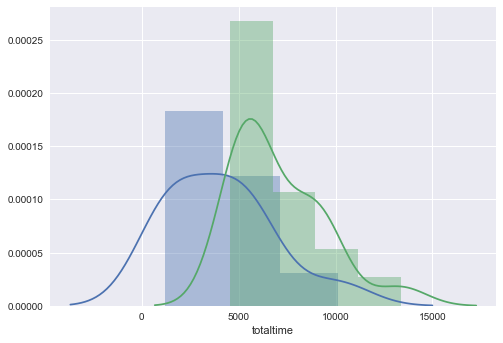

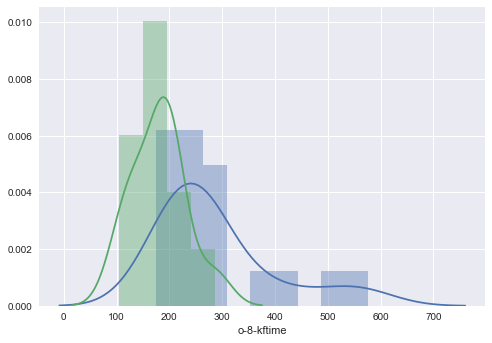

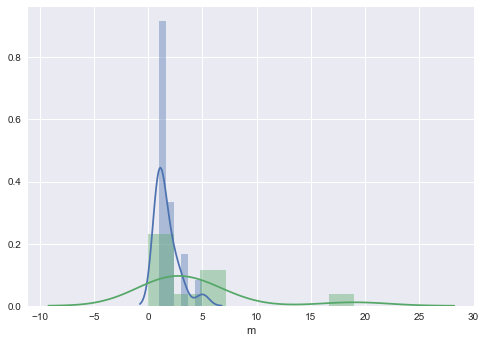

In [411]:
print dfS['totaltime'].mean()
print dfS['totaltime'].median()

sns.distplot(dfS['totaltime'])

totaltime = dfI['totaltime']
totaltime = totaltime[totaltime < totaltime.max()]

sns.distplot(totaltime)
plt.show()

sns.distplot(dfI['o-8-kftime'])
sns.distplot(dfS['o-8-kftime'])
plt.show()

sns.distplot(dfI['m'])
sns.distplot(dfS['m'])
plt.show()

In [412]:
arS = dfS.as_matrix()
arI = dfI.as_matrix()

y = np.r_[np.ones(arS.shape[0]), np.zeros(arI.shape[0])]
X = np.r_[arS, arI]

timecol = X[:, -1]
y = np.delete(y, timecol.argmax(), axis=0)

X = X[timecol < timecol.max()]
timecol = X[:, -1]
X[:, -1] =  300*(((timecol - timecol.min()))/ (timecol.max() - timecol.min()))
P = dfN.as_matrix()
P[:, -1] = 250
X = np.delete(X, -1, axis=1)
P = np.delete(P, -1, axis=1)

In [413]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(P)
print 'Accuracy on predicted', y_pred[y_pred == 1].shape[0]/y_pred.shape[0] * 100

Accuracy on predicted 87.5
